In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import load_mnist_data

In [2]:
X_train, X_test, Y_train, Y_test = load_mnist_data.loadData()

# Convolutional Neural Network (CNN)

- Conv(8, 3×3, s=1, pad=1) → ReLU
- MaxPool(2×2, s=2)
- Flatten
- FC(16*14*14 → 10)
- Softmax + CE
- maybe compare it with normal NN


In [3]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [4]:
inputs = Input(shape=(28, 28, 1), name="images")

X = Conv2D(filters = 8, kernel_size= 3, strides = 1, padding = "same", activation="relu", name="conv1")(inputs)

X = MaxPool2D(pool_size = 2, strides = 2, name="pool1")(X)

X = Flatten(name="flatten")(X)

outputs = Dense(10, activation="softmax", name="head")(X)

model = Model(inputs = inputs, outputs = outputs, name = "mnist_cnn_8f")

In [5]:
model.summary()

Model: "mnist_cnn_8f"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 8)         80        
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 8)         0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 head (Dense)                (None, 10)                15690     
                                                                 
Total params: 15,770
Trainable params: 15,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.optimizers import Adam

In [7]:
model.compile(

    optimizer=Adam(1e-3),
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
    
)


In [8]:
history = model.fit(
                    X_train, Y_train, 
                    epochs = 5, 
                    batch_size = 128, 
                    validation_data = (X_test, Y_test), 
                    verbose=1
)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.5371 - accuracy: 0.8648 - val_loss: 0.2212 - val_accuracy: 0.9355
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1946 - accuracy: 0.9435 - val_loss: 0.1504 - val_accuracy: 0.9557
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1400 - accuracy: 0.9607 - val_loss: 0.1195 - val_accuracy: 0.9659
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9683 - val_loss: 0.0964 - val_accuracy: 0.9726
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0953 - accuracy: 0.9725 - val_loss: 0.0878 - val_accuracy: 0.9741


In [9]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

probs = model.predict(X_test[:5], verbose=0)    # (5,10)
preds = np.argmax(probs, axis=1)
print("Predicted labels:", preds.tolist())
print("True labels     :", np.argmax(Y_test[:5], axis=1).tolist())


Test accuracy: 0.9741
Predicted labels: [7, 2, 1, 0, 4]
True labels     : [7, 2, 1, 0, 4]


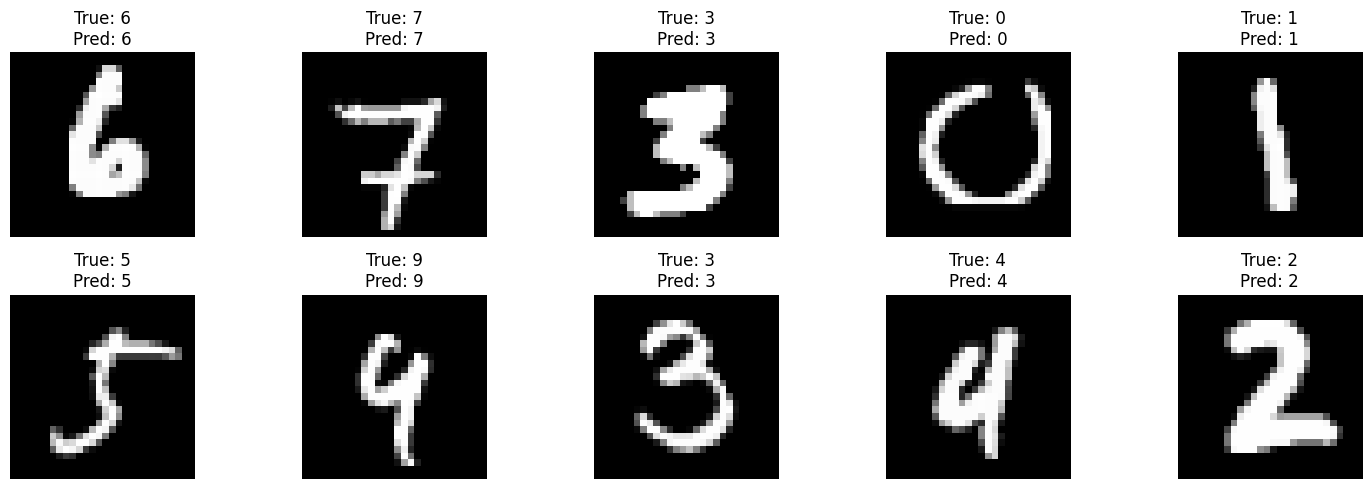

In [10]:
import matplotlib.pyplot as plt

# Pick 10 random indices
idxs = np.random.choice(len(X_test), size=10, replace=False)

# Get the images and true labels
images = X_test[idxs]
true_labels = np.argmax(Y_test[idxs], axis=1)   # since one-hot

# Predict
probs = model.predict(images, verbose=0)
preds = np.argmax(probs, axis=1)

# Plot
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"True: {true_labels[i]}\nPred: {preds[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Total misclassified: 259 out of 10000


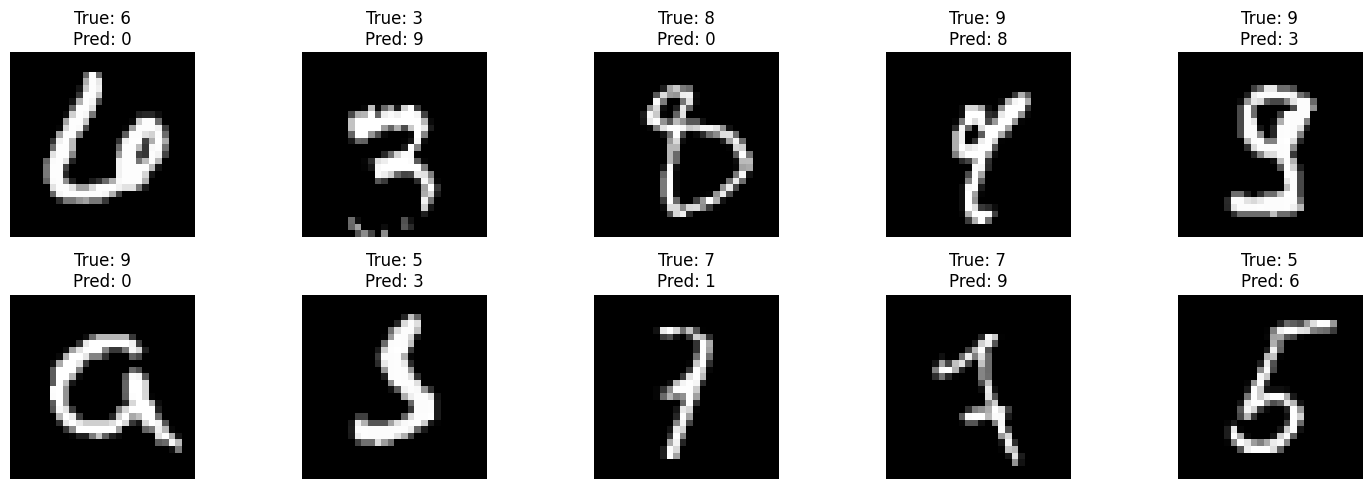

In [11]:
import matplotlib.pyplot as plt

# Predict on all test images
probs = model.predict(X_test, verbose=0)
preds = np.argmax(probs, axis=1)
true_labels = np.argmax(Y_test, axis=1)   # since one-hot

# Find misclassified indices
wrong_idxs = np.where(preds != true_labels)[0]

print(f"Total misclassified: {len(wrong_idxs)} out of {len(X_test)}")

# Pick up to 10 random misclassified samples
if len(wrong_idxs) > 0:
    sample_idxs = np.random.choice(wrong_idxs, size=min(10, len(wrong_idxs)), replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_idxs):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[idx].squeeze(), cmap="gray")
        plt.title(f"True: {true_labels[idx]}\nPred: {preds[idx]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found! 🎉")


In [14]:
# Grab layers by name or index
conv_w, conv_b = model.get_layer("conv1").get_weights()   # (3,3,1,8), (8,)
dense_w, dense_b = model.get_layer("head").get_weights()   # (1568,10), (10,)

# Optional: check shapes
print(conv_w.shape, conv_b.shape, dense_w.shape, dense_b.shape)


(3, 3, 1, 8) (8,) (1568, 10) (10,)


In [19]:
print(conv_w[:, :, :, 0:1])

[[[[-0.2156131 ]]

  [[ 0.26420224]]

  [[ 0.2020092 ]]]


 [[[ 0.39823514]]

  [[ 0.29488373]]

  [[-0.11466848]]]


 [[[ 0.31671348]]

  [[-0.18801329]]

  [[-0.13165075]]]]
